###  优化求极小的问题
+ 模块导入


In [1]:
import time

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


import torch
import torch.optim as optim

## Find the Minimizer of Rosenbrock Function
 $$
     F(x_1,x_2):= 100 (x_2-x_1^2)^2 + (x_1-1)^2
 $$
 
 <img
 src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Rosenbrock_function.svg/1080px-Rosenbrock_function.svg.png"
 width="500" height="500"
 align="center"
 />
 

In [3]:
def rosenbrock(x):
    y = 100 * (x[1]-x[0]*x[0])**2 + (x[0]-1)**2
    return y

In [14]:
x = torch.tensor([1.0,1.0],requires_grad=True)
y = rosenbrock(x)
y.backward()

print('y= ', y.item())
print('dy/dx= ',x.data)

y=  0.0
dy/dx=  tensor([1., 1.])


In [21]:
x = torch.rand(2,requires_grad=True)
print(x)

optimizer = torch.optim.SGD([x],lr=0.001,momentum=0.9,nesterov=True)

tensor([0.2943, 0.0030], requires_grad=True)


In [18]:
records = []

for i in range(500):
    optimizer.zero_grad()
    y = rosenbrock(x)
    y.backward()
    optimizer.step()
    
    if i%100 == 0:
        print('%d, %.2e' %(i+1, y.item()))
    records.append(y.item())
    

1, 4.32e+01
101, 1.19e-01
201, 3.14e-02
301, 1.09e-02
401, 4.18e-03


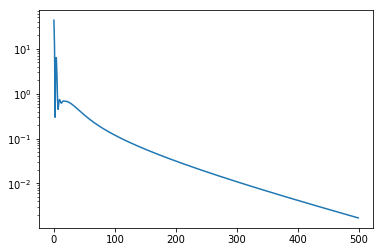

In [19]:
plt.semilogy(records,'-');